# Regression Predict Student Solution

© Explore Data Science Academy

<!-- ---
### Honour Code

I {**TEDDY, WAWERU**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are.  -->

<iframe src="https://www.google.com/maps/d/u/0/embed?mid=1ERB8k7k6qHsvo7VGRwgS1IdKSdgh3-Yn&ehbc=2E312F" width="600" height="300"></iframe>

#### *Team 5 Members*
- Teddy Waweru
- Stella Njuki
- McMunashe Munemo
- Ogaga Oghenekohwo
- Ron 

<a id="cont"></a>

## Table of Contents
Introduction, Problem statement

<a href=#one>1. Importing Packages</a>

[1. Importing Packages](#one_title)

<a href=#introduction>1. Introduction</a>

<a href=#two>2. Loading Data</a>

<a href=#executive_summary>2. Executive Summary</a>

<a href=#methodology>3. Methodology</a>

<a href=#four>4. Data Engineering</a>

<a href=#exploratory_data_analysis>4. Exploratory Data Analysis (EDA)</a>

<a href=#data_engineering>5. Data Engineering</a>

<a href=#modelling>5. Modeling</a>

<a href=#model_performance>6. Model Performance</a>

<a href=#model_explanation>7. Model Explanations</a>

## Introduction


### Problem Statement
Expound the issue <br/>
Frame the solution <br/>
Justify the solution <br/>

1. Introduction
2. Problem Statement
3. Our approach - top level
4. Methodology
5. Results & Comparative performance / Performative comparison
7. Explanation of solution
8. Recommendations
9. Conclusion
10. Questions

### _Summary_ <hr>

The data provided is intended to assist with predicting the effect of climatic conditions in Spain on load shortfalls ofrenewable energy  source production against fossil fuels.<br/>
Agendas:
<br/>
Deliverables:
<br/>
Outcomes:
<br/>
Challenges:
<br/>
Future Considerations:
Multiple data points for prediction(.csv, .json)
<br/>

## Methodology

 <a id="one"></a>
### 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---


In [211]:
# Libraries for data loading, data manipulation
import pandas as pd

#Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.correlation import plot_corr


# Libraries for data preparation
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from statsmodels.distributions.empirical_distribution import ECDF       #Imported for displaying the Empirical Cumulative Distribution of Features
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Libraries for Model Performance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV


#Libraries for mathematical analyses
import numpy as np


#Library for creating pickle files of the models
import pickle

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
### 2. Loading the Datasets
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [212]:
test_df = pd.read_csv('utils/data/df_test.csv')
train_df = pd.read_csv('utils/data/df_train.csv')

<a id="three"></a>
### 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---




*Meeting notes* <br>
Discussing the data:

Starts with the categorical, 
Doing the numerical
Dropping columns immediately

converting the data types

Comments on the data ranges

find the null values
what percentage are these of the total?


#### Investigating the dataset's contents

In [3]:
    print('Dataset Info: \n {}'.format(train_df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

The data contains:
- 46 *numerical* columns
- 3 *categorical* columns <br>
From the data it is noticeable that some of the weather attributes have different data types, such as Sevlle_pressure being categorical, while other cities' pressure values being numerical. Same case for Valencia_wind_deg. It will therefore be necessary to have these attributes in refer to similar data types.


We shall convert the datetime feature into a preferred data type that we can then manipulate.

In [213]:
train_df['time'] = pd.to_datetime(train_df['time'], format='%Y-%m-%d %H:%M:%S')

In [214]:
train_df['time']

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

In [9]:
    print('Dataset Statistical Summary: \n')
    train_df.describe()

Dataset Statistical Summary: 



,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


#####a00
*comments on the ranges of the features*

In [5]:
    print('Dataset Null Values: \n {}'.format(train_df.isna().sum()))

Dataset Null Values: 
 Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp       

Only the 'Seville_pressure' has null values: 2068 values. Gven that the dataset has 8763 entries, the null values are **~24%** of the total. <br>
The data type of Seville_pressure is categorical. In order to fill in the missing values, we shall consider relating features of Seville that *influence* the pressure value, ie. this could be humidity or temperature, which are features that are bound to be highly correlated to atmospheric pressure.

In [6]:
    train_df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


The '**Unnamed 0**' column appears as an indexing column. This will be **dropped** as it won't assist in the model's prediction performance.<br/>


In [225]:
train_df = train_df.drop(['Unnamed: 0'], axis=1)

#### Identifying **'missing'** columns.
These are columns of weather attributes that are not available for a particular city.

In [235]:
#Complete list of all weather attributes for each City in the dataset.
city_weather_attributes = {
    'wind_speed': ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_wind_speed', 'Seville_wind_speed'],
    'wind_deg': ['Madrid_wind_deg', 'Valencia_wind_deg', 'Bilbao_wind_deg', 'Barcelona_wind_deg', 'Seville_wind_deg'],
    'clouds_all': ['Madrid_clouds_all', 'Valencia_clouds_all', 'Bilbao_clouds_all', 'Barcelona_clouds_all', 'Seville_clouds_all'],
    'pressure': ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Barcelona_pressure', 'Seville_pressure'],
    'rain_3h': ['Madrid_rain_3h', 'Valencia_rain_3h', 'Bilbao_rain_3h', 'Barcelona_rain_3h', 'Seville_rain_3h'],
    'weather_id': ['Madrid_weather_id', 'Valencia_weather_id', 'Bilbao_weather_id', 'Barcelona_weather_id', 'Seville_weather_id'],
    'temp_min': ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Barcelona_temp_min', 'Seville_temp_min'],
    'temp_max': ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Barcelona_temp_max', 'Seville_temp_max'],
    'snow_3h': ['Madrid_snow_3h', 'Valencia_snow_3h', 'Bilbao_snow_3h', 'Barcelona_snow_3h', 'Seville_snow_3h'],
    'temp': ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Barcelona_temp', 'Seville_temp'],
    'rain_1h': ['Madrid_rain_1h', 'Valencia_rain_1h', 'Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h'],
    'humidity': ['Madrid_humidity', 'Valencia_humidity', 'Bilbao_humidity', 'Barcelona_humidity', 'Seville_humidity'],
}


# Iterative to determine the missing columns
missing_cols = {}
all_cols = []
for key in city_weather_attributes.keys():
    for attribute in city_weather_attributes[key]:
        all_cols.append(attribute)
        if attribute not in train_df.columns:
            if key not in missing_cols.keys():
                missing_cols[key] = []
            missing_cols[key].append(attribute)
            missing_cols[key].sort()
      
missing_cols_df = pd.DataFrame.from_dict(missing_cols, orient = 'index')
missing_cols_df

,0,1,2
wind_deg,Madrid_wind_deg,Seville_wind_deg,None
clouds_all,Barcelona_clouds_all,Valencia_clouds_all,None
rain_3h,Bilbao_rain_3h,Madrid_rain_3h,Valencia_rain_3h
weather_id,Valencia_weather_id,None,None
snow_3h,Barcelona_snow_3h,Madrid_snow_3h,Seville_snow_3h
rain_1h,Valencia_rain_1h,None,None
humidity,Barcelona_humidity,Bilbao_humidity,None


*####A00 Comment on the above.*

#### Data Visualizations
---

We create a list of numerical & categorical columns for iterative plotting

In [215]:
#List of numerical feature columns in train_df, excluding the prediction variable
num_train_feature_cols = [i for i in train_df.columns if train_df[i].dtype == ('float64') and i != 'load_shortfall_3h']
num_train_feature_cols.sort()

#List of categorical feature columns
cat_train_feature_cols = [i for i in train_df.columns if train_df[i].dtype == ('object')]
cat_train_feature_cols.sort()

print(num_train_feature_cols)
print(cat_train_feature_cols)

['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_weather_id', 'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_weather_id', 'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_weather_id', 'Madrid_wind_speed', 'Seville_clouds_all', 'Seville_humidity', 'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max', 'Seville_temp_min', 'Seville_weather_id', 'Seville_wind_speed', 'Valencia_humidity', 'Valencia_pressure', 'Valencia_snow_3h', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed']
['Seville_pressure', 'Valencia_wind_deg']


##### Numerical Data Visualization

###### Scatter Plots

C:\Users\teddy\AppData\Local\Temp/ipykernel_14280/727781697.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


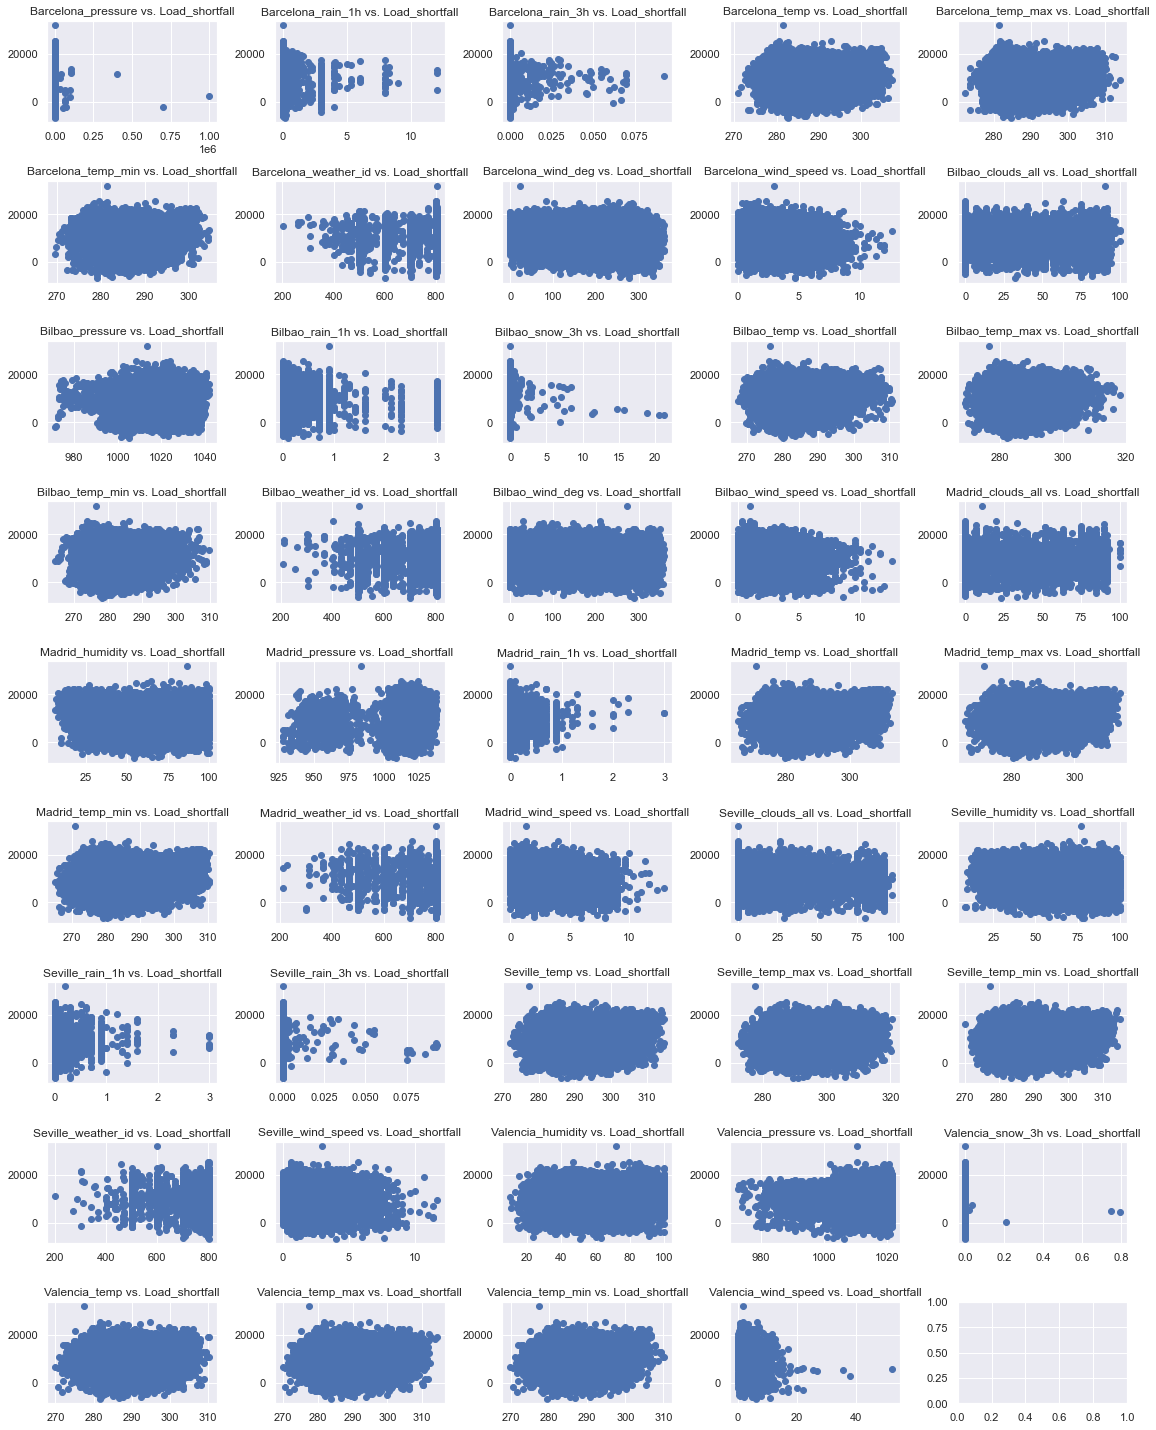

In [9]:
fig, axs = plt.subplots(9,5, figsize=(16,20),)

fig.subplots_adjust(hspace = 0.5, wspace=.2)

i = 0
axs = axs.ravel()

for index, column in enumerate(num_train_feature_cols) :                    #Iterate through the numerical columns
    axs[i].set_title("{} vs. Load_shortfall".format(column),fontsize=12)    #Plot the axis title

    # axs[i].scatter(x=train_df[column],                                      # Plot the scatter graphs
    #                 y=train_df['load_shortfall_3h'],
    #                 color='#349',edgecolor='k')
    axs[i].scatter(x = train_df[column],
                    y = train_df['load_shortfall_3h'])

    i += 1                                         #Iterate to the next axis after plotting 
    fig.tight_layout(pad=1)
    fig.show()

The scatter plots between numerical features & the prediction variable show:
1. None of the features have a verifiable linear relationship with the prediction variable.
2. Some features have particular outliers that differ away from the general clusters. It will be necessary to clean out these datapoints.

###### Histograms

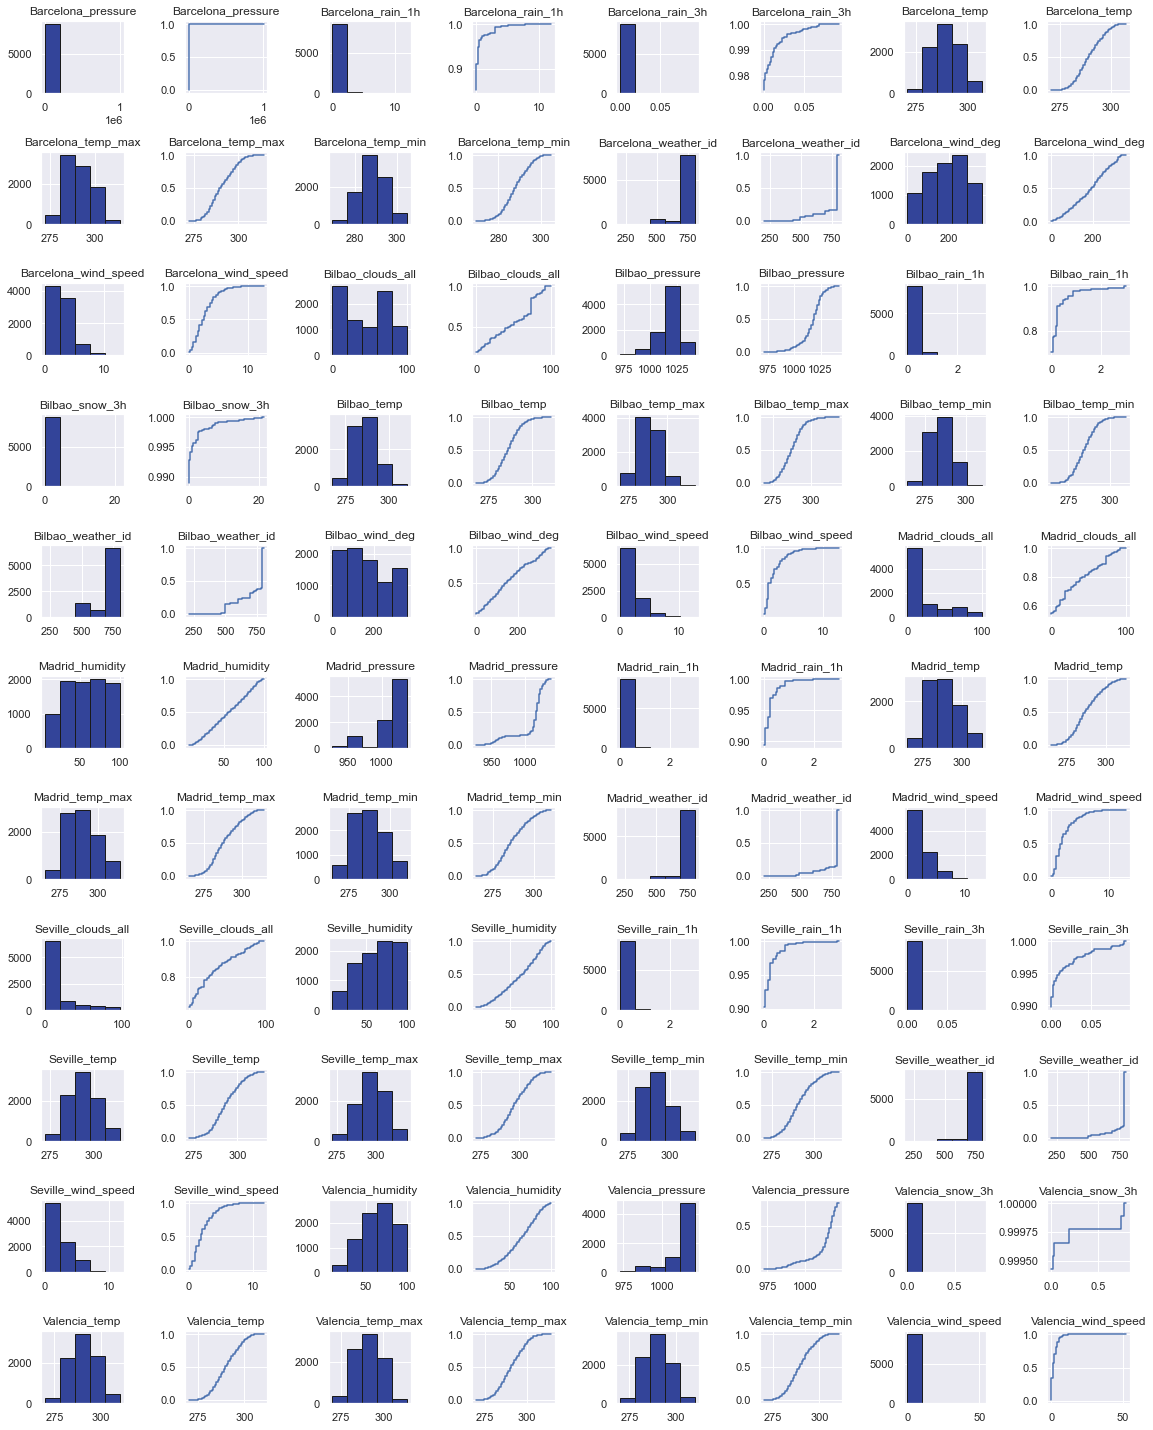

In [ ]:
fig, axs = plt.subplots(11,8, figsize=(16,20),)

fig.subplots_adjust(hspace = 0.5, wspace=.2)

i = 0
axs = axs.ravel()

for index, column in enumerate(num_train_feature_cols) :                    #Iterate through the numerical columns
    axs[i].set_title("{}".format(column),fontsize=12)    #Plot the axis title

    axs[i].hist(x = train_df[column],                                      # Plot the scatter graphs
                    bins = 5,
                    color='#349',edgecolor='k')
    i += 1                                         #Iterate to the next axis after plotting 
    
    ecdf = ECDF(train_df[column])
    x = np.linspace(min(train_df[column]), max(train_df[column]))
    y = ecdf(x)

    axs[i].set_title("{}".format(column),fontsize=12)    #Plot the axis title
    axs[i].step(x = x, y = y)

    i += 1                                         #Iterate to the next axis after plotting 
    fig.tight_layout(pad=1)
    # fig.show()

The plot shows the **frequency distribution** of the features' data, & would assist in eliminating features who's variance may not serve the predictability nature of the model.

Each histogram includes an Empirical Cumulative Distribution plot to similarly show the frequency distribution. <br/> <br>


#####a00 add comments on specific graphs that have been displayed above.


##### Categorical Data Visualization

###### Bar Charts
Plotting **Bar Charts** of categorical data, excluding the time feature

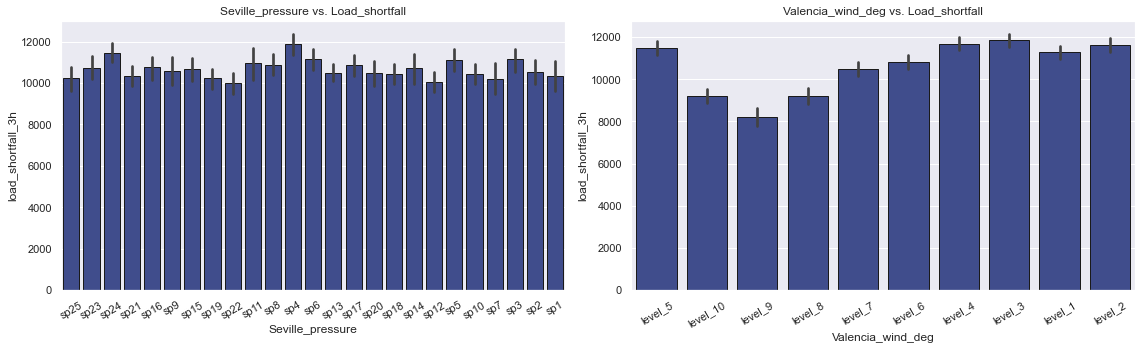

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(16,5),)

fig.subplots_adjust(hspace = 0.5, wspace=.2)

i = 0
axs = axs.ravel()
cols = [i for i in cat_train_feature_cols if i != 'time']   #List of columns excluding the time feature.

for index, column in enumerate(cols) :                    #Iterate through the numerical columns
    axs[i].set_title("{} vs. Load_shortfall".format(column),fontsize=12)    #Plot the axis title

    # axs[i].bar(x = train_df[column],                                      # Plot the scatter graphs
    #             height = train_df['load_shortfall_3h'],
    #             color='#349',edgecolor='k')

    sns.barplot(x = train_df[column],                                      # Plot the scatter graphs
                y = train_df['load_shortfall_3h'],
                color='#349',edgecolor='k',
                ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 30)

    i += 1                                         #Iterate to the next axis after plotting 
    fig.tight_layout(pad=1)
    # fig.show()

1. There is small variation on the Load shortfall through the categories of Seville Pressure, ranging between 10K - 12K
2. For Valencia Wind Degree, the variation ranges between 8K - 12K <br/>
The above chart shall be updated in data engineering once the other feature variables required in categorical format are converted.

###### Time Line Graphs

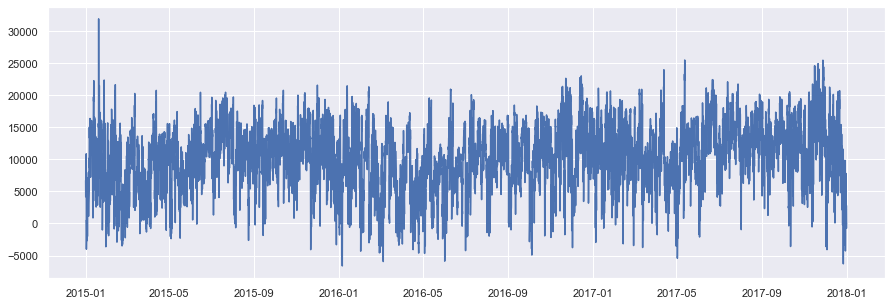

In [142]:
fig, axs = plt.subplots(figsize = (15,5))
axs.plot(train_df['time'],
        train_df['load_shortfall_3h'],
            )

There are both **positive** and **negative** shortfall values. <br/>
The shortfall is the **difference** between the energy generated by means of fossil fuels and various renewable sources. As such, the positive shortfall values indicate that there is a deficit in the amount of energy produced by renewable sources compared to the energy supplied by fossil fuels. The negative shortfall values on the other hand indicate that the amount of energy generated by renewable resources surpasses that of fossil fuels.

##### Homeoscedastity

####a00

##### Residual curves

####a00

##### Kurtosis Values

In [77]:
train_df.kurtosis()

C:\Users\teddy\AppData\Local\Temp/ipykernel_10804/861045134.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

In the case of a regression model, **outliers** change the model's equation which leads to errors in estimation. <br/>

A kurtosis of **> 3** is high which indicates a **large number of outliers** whereas a low kurtosis < 3 indicates a lack of outliers. Evidently some weather conditions in various cities have a large number of outliers. <br/>

These include: *Bilbao_rain_1h, Valencia_wind_speed, Bilbao_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h, Madrid_weather_id, Barcelona_weather_id, and Seville_weather_id*. <br/> When buiding our model, we will take note of these features.

##### Correlation

We declare the heatmap plot as a function, as this may be references a lot of times during the model development.

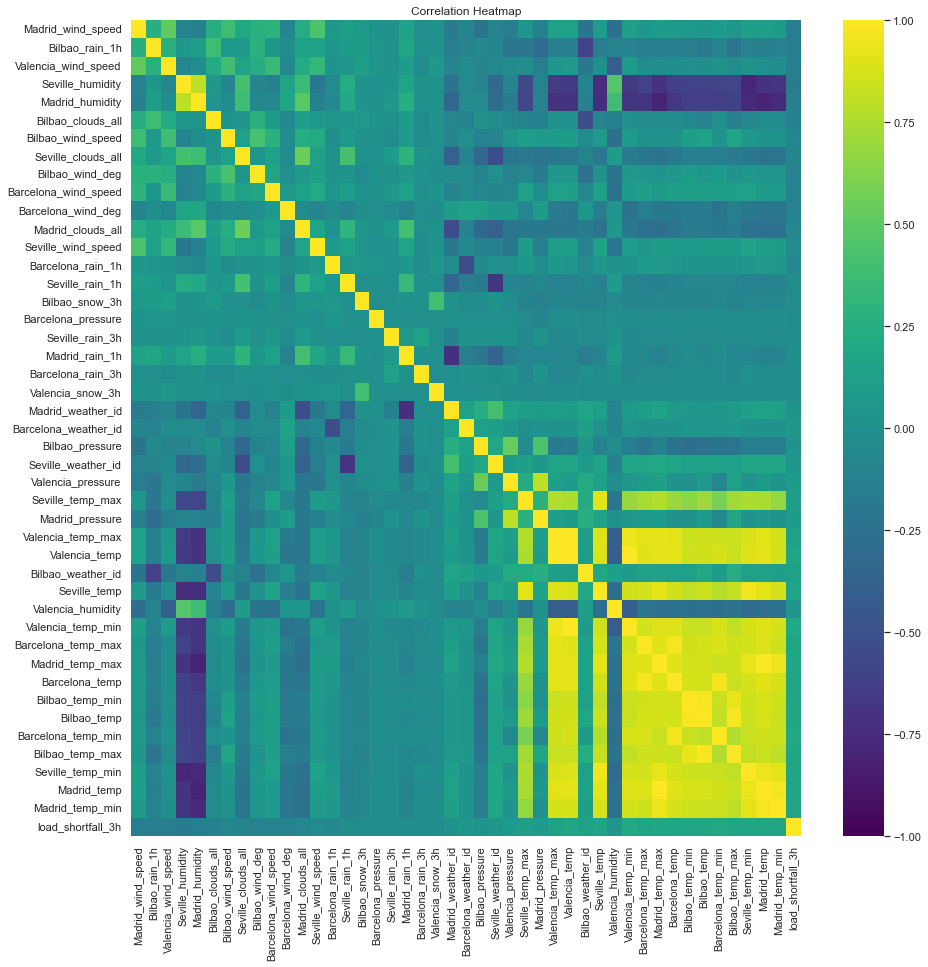

In [247]:
# evaluate correlation
def plot_corr(data_df):
    fig, ax = plt.subplots(figsize = (15,15))
    heatmap = sns.heatmap(data_df.corr(),ax=ax, vmin=-1, vmax=1, annot=False, cmap="viridis")
    heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

plot_corr(train_df)

####a00 add comments on the above heatmap<br/> which features show high correlations, which cities?


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [237]:
train_df.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


We create a copy DF for manipulation.

In [226]:
train_copy_df = train_df.copy(deep = True)

### Dealing with Outliers

---

#####a00 code required

### Replacing Null values

---

As previously seen, **Valencia_pressure** contained 2068 null values.
In order to carry out the replacement, we need to determine the columns that show the highest correlation with Valencia_pressure. <br/>
Based on the correlation heatmap above, we can see the highest correlation would be with the pressure attributes of other cities with the highest correlation being with Madrid_pressure. This can be concluded as to being due to the close proximity of the cities & that they're all at fairly the same height above sea level.<br/>
We shall use Madrid_pressure to fill in the missing values.

In [99]:
train_copy_df[['Madrid_pressure', 'Valencia_pressure']].describe()

,Madrid_pressure,Valencia_pressure
count,8763.000000,6695.000000
mean,1010.316920,1012.051407
std,22.198555,9.506214
min,927.666667,972.666667
25%,1012.333333,1010.333333
50%,1017.333333,1015.000000
75%,1022.000000,1018.000000
max,1038.000000,1021.666667


In [240]:
train_copy_df[['Madrid_pressure', 'Valencia_pressure']].corr()

,Madrid_pressure,Valencia_pressure
Madrid_pressure,1.000000,0.799272
Valencia_pressure,0.799272,1.000000


We see that the statistical values (mean & quartiles) are within a similar range of values. Only the std differs greatly. <br/>
Below is a scatter plot showing the distribution. <br/>
The correlation factor is also significantly high: ~0.8

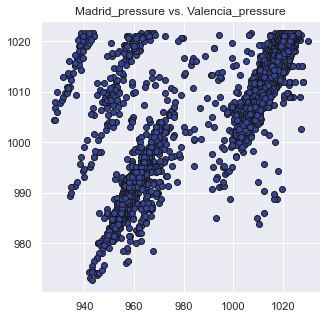

In [375]:
fig, axs = plt.subplots(figsize=(5,5),)

axs.set_title("Madrid_pressure vs. Valencia_pressure".format(column),fontsize=12)    #Plot the axis title

axs.scatter(x = train_df['Madrid_pressure'],            #Plot the scatter
                y = train_df['Valencia_pressure'],
                color='#349',edgecolor='k')

The points appear clustered in **four** regions, & has some form of linear relationship that we can exploit. <br/>
For simple manipulation, we shall replace the null values in Valencia_pressure with the corresponding Madrid_pressure values.

In [227]:
#Replace the null values in Valencia_pressure with Madrid_pressure values on the same row.
train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(), 'Madrid_pressure']

In [21]:
train_copy_df[['Madrid_pressure', 'Valencia_pressure']].describe()

,Madrid_pressure,Valencia_pressure
count,8763.000000,8763.000000
mean,1010.316920,1014.442885
std,22.198555,12.413168
min,927.666667,940.000000
25%,1012.333333,1012.000000
50%,1017.333333,1016.666667
75%,1022.000000,1020.666667
max,1038.000000,1038.000000


In [12]:
train_copy_df[['Madrid_pressure', 'Valencia_pressure']].corr()

,Madrid_pressure,Valencia_pressure
Madrid_pressure,1.000000,0.815955
Valencia_pressure,0.815955,1.000000


The statistical summary is almost identical now, & the correlation factor has increased by 0.2 points. <br/>
We anticipate that either columns may be excluded during the model development due to the high correlation.

### Splitting Features

---

We would wish to split the time column in order to have the: year, month & time, as separate features. We believe that there could be some insight in these features, ie.:
1. Progression in years may show a rate of change in energy supplied from renewable & fossil fuel sources.
1. Different monthly seasons maay have an effect on the energy supply from renewable sources.
2. Hourly charts shal provide the most relevant hours of the day when load shortfalls occur.

In [228]:
train_copy_df['year'] = pd.DatetimeIndex(train_copy_df['time']).year
train_copy_df['month'] = pd.DatetimeIndex(train_copy_df['time']).month
train_copy_df['day'] = pd.DatetimeIndex(train_copy_df['time']).day
train_copy_df['hour'] = pd.DatetimeIndex(train_copy_df['time']).hour
train_copy_df = train_copy_df.drop(columns= 'time')


We shall also include seasonal based categories basedon the 'month' column as such:<br/>
Month  1-3: Winter, Month 4-6: Spring, Month 7-9: Summer, Month 10-12: Autumn <br/>

In [233]:
#Create a column feature for seasons
# Month  1-3: Winter, Month 4-6: Spring, Month 7-9: Summer, Month 10-12: Autumn

train_copy_df.loc[train_copy_df['month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
train_copy_df.loc[train_copy_df['month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
train_copy_df.loc[train_copy_df['month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
train_copy_df.loc[train_copy_df['month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

train_copy_df = train_copy_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)

# Re-organize the column features
col_titles = ['year'] + ['month'] + ['day'] + ['hour'] + \
     [col for col in train_copy_df.columns \
     if col not in ['year', 'month', 'day', 'hour','load_shortfall_3h']] + \
         ['load_shortfall_3h']

train_copy_df = train_copy_df.reindex(columns= col_titles)

train_copy_df.head(3)

,year,month,day,hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,winter,spring,summer,autumn,load_shortfall_3h
0,2015,1,1,3,0.666667,level_5,0.0,0.666667,74.333333,64.000000,...,281.013000,269.338615,274.254667,265.938000,265.938000,1,0,0,0,6715.666667
1,2015,1,1,6,0.333333,level_10,0.0,1.666667,78.333333,64.666667,...,280.561667,270.376000,274.945000,266.386667,266.386667,1,0,0,0,4171.666667
2,2015,1,1,9,1.000000,level_9,0.0,1.000000,71.333333,64.333333,...,281.583667,275.027229,278.792000,272.708667,272.708667,1,0,0,0,4274.666667


We shall plot box plots of these time values against load shortfall to gain further details on the distribution of the predict variable.

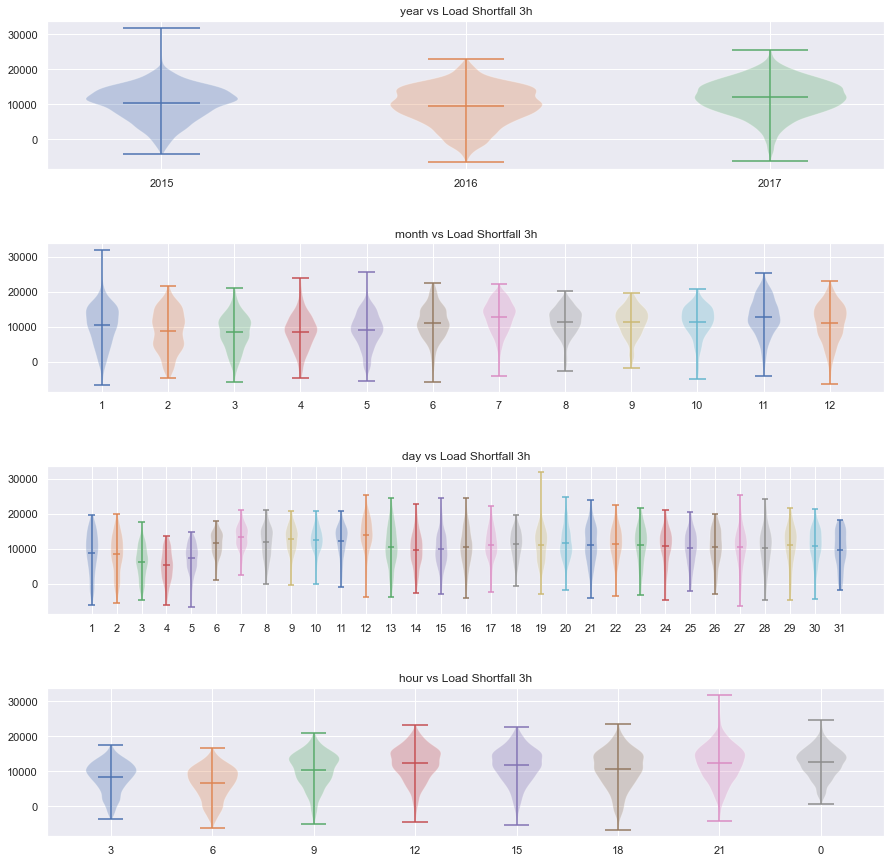

In [381]:
fig, axs = plt.subplots(4,1,
            figsize = (15,15),
            )

axs = axs.ravel()

fig.subplots_adjust(hspace = 0.5, wspace=.2)

i = 0
for idx, col in enumerate(['year','month', 'day', 'hour']):
    axs[i].set_title('{} vs Load Shortfall 3h'.format(col))

    x_tick_labels = train_copy_df[col].unique()
    axs[i].set_xticks([idx for idx, val in enumerate(x_tick_labels)])
    axs[i].set_xticklabels(x_tick_labels)
    for idx, val in enumerate(train_copy_df[col].unique()):
        axs[i].violinplot(train_copy_df.loc[train_copy_df[col]== val,'load_shortfall_3h'],
                            positions = [idx],
                            showmeans = True,
                            showextrema = True)
        # sns.boxplot(
        #     x = train_copy_df[col],
        #     y = train_copy_df['load_shortfall_3h'],
        #     # hue = 'red',
        #     ax = axs[i],
        # )
    i += 1

#####a00 add a line graph.
#####a00 add comments.


### Dummy Variables

---

We conduct one-hot encoding on all categorical features & generate their dummy variables.

In [238]:
dummies_df = pd.get_dummies(train_copy_df[['Valencia_wind_deg','Seville_pressure']], drop_first = True)

train_copy_df = pd.concat([train_copy_df, dummies_df], axis='columns')
train_copy_df = train_copy_df.drop(['Valencia_wind_deg', 'Seville_pressure' ], axis='columns')
train_copy_df.head(5)

,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,2015,1,1,3,0.666667,0.0,0.666667,74.333333,64.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2015,1,1,6,0.333333,0.0,1.666667,78.333333,64.666667,0.0,...,0,0,1,0,0,0,0,0,0,0
2,2015,1,1,9,1.000000,0.0,1.000000,71.333333,64.333333,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2015,1,1,12,1.000000,0.0,1.000000,65.333333,56.333333,0.0,...,0,0,1,0,0,0,0,0,0,0
4,2015,1,1,15,1.000000,0.0,1.000000,59.000000,57.000000,2.0,...,0,0,1,0,0,0,0,0,0,0


We reorder the columns so that dependent variable is the last column in the dataframe

In [239]:
column_titles = [col for col in train_copy_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_copy_df = train_copy_df.reindex(columns = column_titles)

#### Feature Selection

---

We shall implement the SelectKBest tool to select the Best features for our modelling.

In [243]:
def select_k_best(data_df):
    data_df, y_df, x_df = create_x_y_df(data_df)
    X_train, X_test, y_train, y_test = train_test_split(x_df,
                                                        y_df,
                                                        test_size= 0.2,
                                                        random_state=1)

    fs = SelectKBest(score_func= f_regression, k = 30)

    fs.fit(X_train, y_train)

    X_train_fs, X_test_fs = fs.transform(X_train), fs.transform(X_test)

    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
        
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()


    return fs, X_train_fs, X_test_fs


Feature 0: 123.443478
Feature 1: 289.566590
Feature 2: 53.143010
Feature 3: 147.485467
Feature 4: 168.184166
Feature 5: 155.999921
Feature 6: 150.383913
Feature 7: 199.933755
Feature 8: 166.694006
Feature 9: 111.428811
Feature 10: 48.904679
Feature 11: 67.340821
Feature 12: 99.337947
Feature 13: 82.496215
Feature 14: 110.957042
Feature 15: 50.155624
Feature 16: 19.197641
Feature 17: 25.986747
Feature 18: 8.423859
Feature 19: 9.273211
Feature 20: 9.238765
Feature 21: 5.709159
Feature 22: 4.924311
Feature 23: 3.659013
Feature 24: 4.080139
Feature 25: 7.854168
Feature 26: 32.965901
Feature 27: 14.347627
Feature 28: 30.299664
Feature 29: 47.381216
Feature 30: 88.576194
Feature 31: 65.554489
Feature 32: 139.689910
Feature 33: 201.849708
Feature 34: 149.794458
Feature 35: 176.774871
Feature 36: 12.204771
Feature 37: 278.320586
Feature 38: 187.815842
Feature 39: 229.299218
Feature 40: 233.012046
Feature 41: 196.559999
Feature 42: 202.891055
Feature 43: 271.945812
Feature 44: 212.757531
Featur

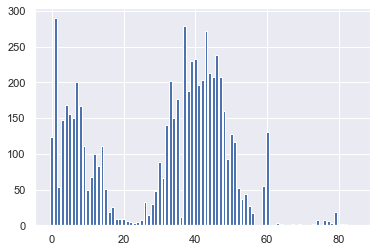

In [244]:
fs,_,_ = select_k_best(train_copy_df)

In [245]:
filter = fs.get_support()
features = np.array([i for i in train_copy_df.columns if i not in 'load_shortfall_3h'])
# features
print(features[filter])

['year' 'month' 'hour' 'Madrid_wind_speed' 'Bilbao_rain_1h'
 'Valencia_wind_speed' 'Seville_humidity' 'Madrid_humidity'
 'Bilbao_clouds_all' 'Bilbao_wind_deg' 'Barcelona_wind_deg'
 'Valencia_temp_max' 'Valencia_temp' 'Bilbao_weather_id' 'Seville_temp'
 'Valencia_temp_min' 'Barcelona_temp_max' 'Madrid_temp_max'
 'Barcelona_temp' 'Bilbao_temp_min' 'Bilbao_temp' 'Barcelona_temp_min'
 'Bilbao_temp_max' 'Seville_temp_min' 'Madrid_temp' 'Madrid_temp_min'
 'winter' 'summer' 'autumn' 'Valencia_wind_deg_level_9']


#### Correlation

---

We draw correlation graphs & heatmaps for the dataset

##### Correlation Heatmap

We use the `plot_corr` function to plot the heatmap.

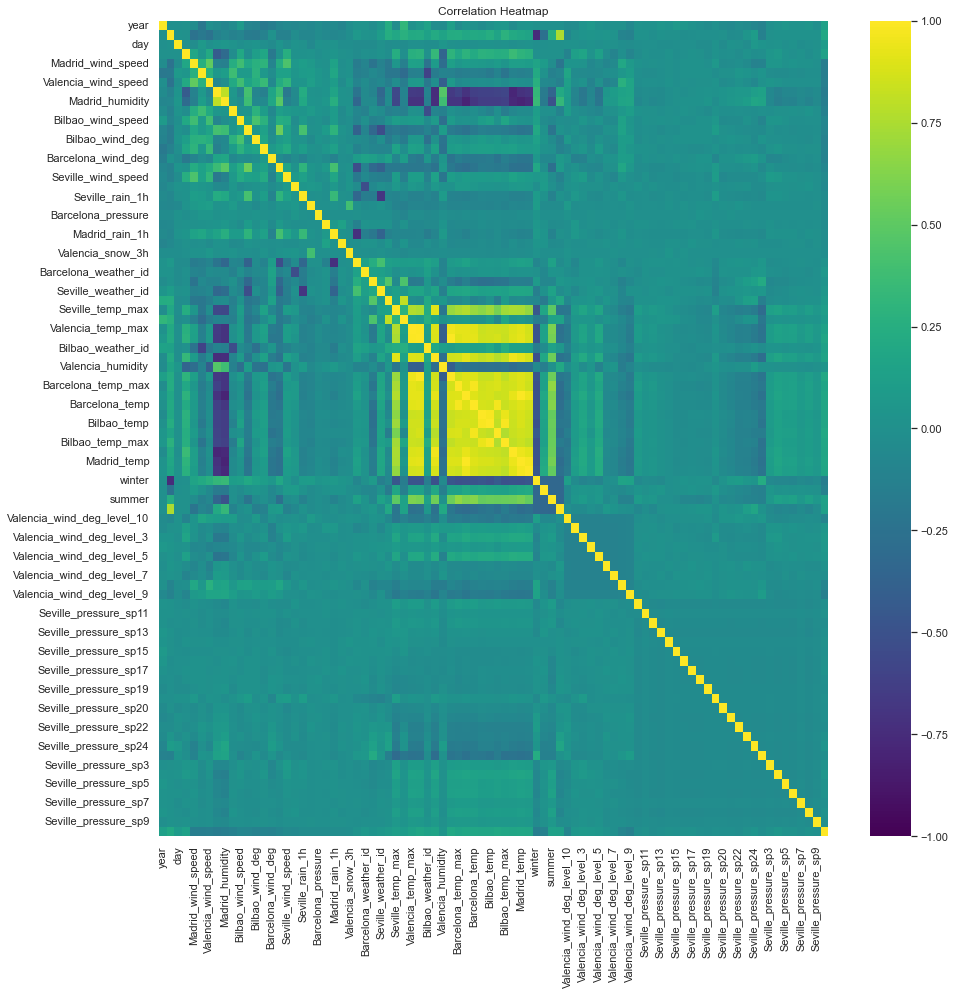

In [248]:
plot_corr(train_copy_df)

The heatmap indicates high muticollinearity between some columns which are denoted with 'min' and 'max'. <br/>
For example Madrid_temp and Madrid_temp_min are highly correlated. When variables are highly correlated, one can be predicted from the other. <br/>

#####a00 <br/>
We shall create a function that will enable us to filter out columns based on their correlation coefficient. This shall be iterated until a preferred value is achieved in our modelling sections. 

##### Correlation Table

In [251]:
train_copy_df.corr()

,year,month,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h
year,1.000000,-0.001039,0.000275,-0.031553,-0.200747,-0.012650,-0.045730,-0.084456,-0.031658,0.082611,...,-0.084080,-0.109419,-0.001650,0.024520,0.051181,0.027625,0.026966,0.041181,-0.008904,0.131324
month,-0.001039,1.000000,0.000301,-0.237445,-0.188274,-0.237156,-0.111622,-0.076567,-0.117452,-0.086698,...,0.094816,-0.131836,0.001764,0.012780,0.014737,0.016328,0.011313,0.012210,0.017350,0.199048
hour,0.000275,0.000301,1.000000,0.186228,0.054527,0.204103,-0.424982,-0.307872,-0.023714,0.197848,...,-0.022605,-0.010799,0.051485,0.071537,0.018328,-0.004544,0.008957,-0.022851,0.020409,0.139285
Madrid_wind_speed,-0.031553,-0.237445,0.186228,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,...,-0.113807,-0.101987,0.051647,0.050881,0.023339,0.035207,0.012197,0.012842,-0.005568,-0.150981
Bilbao_rain_1h,-0.200747,-0.188274,0.054527,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,...,-0.001711,0.038834,-0.024340,-0.032579,-0.031405,-0.021876,-0.026230,-0.013346,-0.010522,-0.152510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seville_pressure_sp6,0.027625,0.016328,-0.004544,0.035207,-0.021876,-0.006408,-0.072023,-0.103408,0.010356,-0.010343,...,-0.048832,-0.049147,-0.042411,-0.048768,-0.046708,1.000000,-0.031574,-0.049648,-0.032397,0.019967
Seville_pressure_sp7,0.026966,0.011313,0.008957,0.012197,-0.026230,-0.005885,-0.049795,-0.061511,0.000495,-0.013488,...,-0.031331,-0.031534,-0.027211,-0.031291,-0.029969,-0.031574,1.000000,-0.031855,-0.020787,-0.012828
Seville_pressure_sp8,0.041181,0.012210,-0.022851,0.012842,-0.013346,-0.000902,-0.062759,-0.094460,0.038058,-0.006562,...,-0.049266,-0.049584,-0.042788,-0.049203,-0.047124,-0.049648,-0.031855,1.000000,-0.032686,0.009394
Seville_pressure_sp9,-0.008904,0.017350,0.020409,-0.005568,-0.010522,-0.001530,-0.042192,-0.053552,-0.003176,-0.003113,...,-0.032148,-0.032356,-0.027921,-0.032107,-0.030750,-0.032397,-0.020787,-0.032686,1.000000,-0.002491


In [249]:
#function to select columns with a correlation coefficient geater than threshold specified
def filter_by_corr(data_df, threshold=0.9, remove_negative=False):
    corr_mat = data_df.corr()

    corr_mat = np.abs(corr_mat)                     #convert to positive values
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)    #change values above the k-th diagonal to zero.
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][corr_mat[col] > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat                                  #return columns to be dropped

We shall proceed to trying out various models to investigate which one offers the best predictability outcome for our project.<br/>

#### Scaling of data

 ####a00 Standardizing  the data using z-score standardization due to the presence of outliers in our data

##### Implementing Ridge & Lasso Regression

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

The following models have been covered:
- Ordinary Linear Regression
- Decision Trees
- Random Forest

### Ordinary Linear Regression

---

The reason we go for regression model is we want to understand the impact of all the variables on the load_shortfall which is our target, individually.

####a00

We create a function that will:
1. Create a copy of the dataset specifically for the OLS modelling.
2. Create x, y variable DFs (if needed).
3. Return these DFs <br/>

This will become necessary once we start considering different perspectives of the OLS models, whereby some columns are removed in one instance & returned in another. It shall form the basic foundation of restarting the modelling cycle. Also, older models don't necessarily have to be 'lost'.

In [105]:
def create_x_y_df(train_copy_df = train_copy_df):
    train_ols_df = train_copy_df.copy(deep = True)
    y_ols_df = train_ols_df['load_shortfall_3h']
    x_ols_df = train_ols_df[[i for i in train_ols_df if i not in 'load_shortfall_3h']]

    return train_ols_df, y_ols_df, x_ols_df

We define a function that will:
1. Generate the formula string for the model to be built, depending on the variables that have been selected.
2. Fit the OLS model based on the variables that have been selected.
3. Return the fitted model.

In [106]:
def fit_ols_model(data_df = None):
    #the dependent variable 
    y_shortfall = 'load_shortfall_3h'

    #the independent variables
    x_cols = [col for col in data_df.columns if col not in ['load_shortfall_3h', 'time']]

    #build OLS formula string
    formula_str = y_shortfall + " ~ " + " + ".join(x_cols)
    # print ("Formula:\n\t {}".format(formula_str))
    print(data_df.columns)

    #fit the model using the model dataframe
    model = ols(formula = formula_str, data = data_df)
    fitted_ols_model = model.fit()
    print('OLS Model Regression report: \n \t {}'.format(fitted_ols_model.summary()))

    return fitted_ols_model

We can carry out a sample OLS model based on all the available columns that are currently in the dataset. This will give us the **maximum R-squared** value that is achievable with this dataset. <br/>
We first start by creating the datasets based on the `create_ols_df()` function, then calling the `fitted_ols_model` function

In [362]:
# Create the dataframes to be used in this model creation instance
train_ols_df, y_ols_df, x_ols_df = create_ols_df()

# Fit it for an OLS Regression Model
fitted_ols_model = fit_ols_model(train_ols_df)

Index(['time', 'year', 'month', 'hour', 'Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp',

From the report, the max R-squared acheivable for the OLS is ~17%, which is significanlty low for a working model. <br/>
Regardless, we shall carry out feature filtering in the following sections in attempt to improve the OLS model that can be developed through this strategy.

#### Filtering based on Correlation
Since our data has plenty of correlating features, we begin by filtering these out based ona threshold, so that we can fit the remaining ones & see what impact this will have on our OLS model. <br/>
We do this by referencing the `filter_by_corr()` function in the data engineering section. <br/>

In [364]:
# Create the dataframes to be used in this model creation instance
train_ols_df, y_ols_df, x_ols_df = create_ols_df()

# List to hold the correlating columns that we shall remove.
# We have set the correlation threshold to 0.8 for this instance
corr_cols = filter_by_corr(train_ols_df, threshold=0.4)

print('Number of Columns to be filtered: \t {} columns \n Columns: \n {}'.format(len(corr_cols), corr_cols))

Number of Columns to be filtered: 	 30 columns 
 Columns: 
 ['hour', 'Seville_wind_speed', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Seville_temp_max', 'Valencia_temp_max', 'Valencia_temp', 'Seville_temp', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_rain_1h', 'Seville_weather_id', 'Seville_clouds_all', 'Barcelona_rain_1h', 'Madrid_rain_1h', 'Madrid_pressure', 'Bilbao_pressure', 'Valencia_humidity']


The above are the columns that exhibit high correlation with other features, based on the threshold, & we shall drop them before fitting an OLS model.

In [366]:
train_ols_df_v01 = train_ols_df[[i for i in train_ols_df.columns if i not in corr_cols]]

train_ols_df_v01.shape

(8763, 52)

Plot Correlation Heatmap

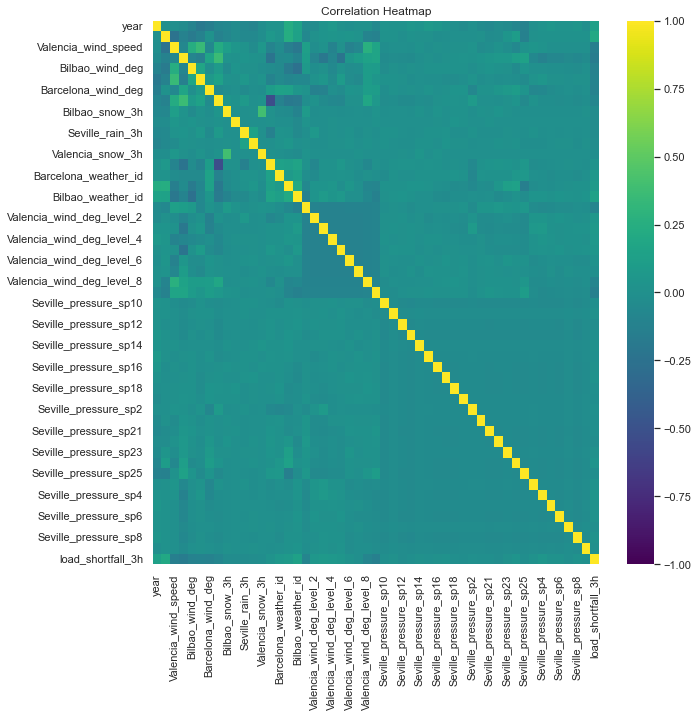

In [367]:
plot_corr(train_ols_df_v01)

 We fit the above dataset to an OLS model through the `fit_ols_model()` function

In [368]:
# Fit it for an OLS Regression Model
fitted_ols_model = fit_ols_model(train_ols_df_v01)

Index(['time', 'year', 'month', 'Valencia_wind_speed', 'Seville_humidity',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Valencia_pressure',
       'Bilbao_weather_id', 'Valencia_wind_deg_level_10',
       'Valencia_wind_deg_level_2', 'Valencia_wind_deg_level_3',
       'Valencia_wind_deg_level_4', 'Valencia_wind_deg_level_5',
       'Valencia_wind_deg_level_6', 'Valencia_wind_deg_level_7',
       'Valencia_wind_deg_level_8', 'Valencia_wind_deg_level_9',
       'Seville_pressure_sp10', 'Seville_pressure_sp11',
       'Seville_pressure_sp12', 'Seville_pressure_sp13',
       'Seville_pressure_sp14', 'Seville_pressure_sp15',
       'Seville_pressure_sp16', 'Seville_pressure_sp17',
       'Seville_pressure_sp18', 'Seville_pressure_sp19',
       'Seville_pressure_sp2', 'Seville_pr

Regardless the report shows that there still exists some form of multicollinearity between our feature columns. We should definitely attempt to reduce the number of columns that are included into our fitting to see if that improves the values that we get from the report. <br/>

#### Filtering based on P-value

We can attempt this by focusing on the **P-value**. The smaller the **P-value** the stronger the evidence that we should reject the *null hypothesis*: that the feature has no significant relationship to our prediction variable(_'load_shortfall_3h'_).<br/>
Hence a P-value **less than 5%** (typically <= 0.05) is **stastistically significant**. <br/>
We will only consider features which have a p-value of < 0.05 All the features are statistically significant. i.e their p-values are <0.05 <br/> <br/>

We also consider the 1%, 5% and 10% level of significance and disregarding if it exceeds 10% <br/>

For example we can see that the Madrid_wind_speed has a very low P-value and has a coefficeint of -240.9207 meaning if Madrid_wind_speed increases by 1 unit then the load_shortfall decreases by -240.9207 units <br/>


Let us evaluate their **significance** and correlation. Lets evaluate features that have the strongest correlations (both positive and negative)

We create a function that filters the P-values received from the above fitting procedure.

In [354]:
def filter_by_p(data_df, fitted_ols_model, threshold = 0.05):
    #calculate the correlation between predictor variables and the response variable
    # corrs = data_df.corr()['load_shortfall_3h'].sort_values(ascending=False)

    #Build a dictionary of correlation coefficients and p-values
    filt_p_dict = {}

    column_titles = [col for col in data_df.columns if col not in ['load_shortfall_3h','time']]
    for col in column_titles:
        p_val = fitted_ols_model.pvalues[col]
        # p_val = round(pearsonr(data_df[col], data_df['load_shortfall_3h'])[1],6)
        filt_p_dict[col] = {
                                # 'Correlation_Coefficient':corrs[col],
                                'P_Value':p_val}

    #create a new dataframe to store the correlation coefficients and p-values for reference    
    filter_p_df = pd.DataFrame(filt_p_dict).T
    filter_p_df_sorted = filter_p_df.sort_values('P_Value')

    return filter_p_df_sorted[filter_p_df_sorted['P_Value']< threshold]

In [355]:
filter_p_df = filter_by_p(train_ols_df_v01, fitted_ols_model, threshold= 0.05)
filter_p_df

,P_Value
month,1.677750e-36
Seville_humidity,5.135925e-28
year,2.337931e-18
Barcelona_wind_deg,4.970454e-12
Valencia_wind_deg_level_9,1.620783e-09
Bilbao_weather_id,3.854652e-07
Valencia_wind_speed,2.647410e-06
Valencia_wind_deg_level_10,2.973979e-06
Bilbao_wind_deg,4.225498e-06
Barcelona_weather_id,1.880120e-05


The above clumns have a P-value less than 0.05 from the OLS Report. <br/>
Let's re-fit the model while considering only the above columns.

In [356]:
# Fit it for an OLS Regression Model
fitted_ols_model = fit_ols_model(train_ols_df_v01[[i for i in train_ols_df_v01.columns if i in filter_p_df.index] + ['load_shortfall_3h']])

Index(['year', 'month', 'Valencia_wind_speed', 'Seville_humidity',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Bilbao_weather_id', 'Valencia_wind_deg_level_10',
       'Valencia_wind_deg_level_8', 'Valencia_wind_deg_level_9',
       'Seville_pressure_sp12', 'Seville_pressure_sp24',
       'Seville_pressure_sp25', 'Seville_pressure_sp7', 'load_shortfall_3h'],
      dtype='object')
OLS Model Regression report: 
 	                             OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     67.97
Date:                Sat, 26 Feb 2022   Prob (F-statistic):          3.79e-232
Time:                        13:34:56   Log-Likelihood:                -86870.
N

The conditional Number is larger than before, despite having dropped multiple columns. <br/>
We see that the model is not significantly improved, as there still contains mutlicollinearity aspects to our features. <br/>
As seen in our EDA section, there was little indication of Linear relationship between our features & the predict variable. This confirms it. <br/>
We shall continue with training our model based on this.

In [357]:
train_ols_df_v01_final = train_ols_df_v01[[i for i in train_ols_df_v01.columns if i in filter_p_df.index] + ['load_shortfall_3h']]

#### Training of a Linear Regression Model

---

We define a function that will:
1. Split the data into test & train datasets
2. Create the train test datasets for correlation & variance
3. Declare the LinearRegression objects
4. Train the model
5. Create a .pkl file of the model
6. Generate the plots for assessing the accuracy of the model.


In [341]:
# split data
def train_ols_model(x_ols_df, y_ols_df):
    x_train, x_test, y_train, y_test = train_test_split(x_ols_df,
                                                        y_ols_df,
                                                        test_size=0.20,
                                                        shuffle=False)
    # Training and testing data for correlation threshold model
    x_corr_train = x_train[x_ols_df.columns]
    x_corr_test = x_test[x_ols_df.columns]

    # Training and testing data for variance threshold model (threshold = 0.1)
    x_var_train = x_train[x_ols_df.columns]
    x_var_test = x_test[x_ols_df.columns]

    #Declare the LinearRegression objects for the model, correlation & variance 
    lrm = LinearRegression()
    lrm_corr = LinearRegression()
    lrm_var = LinearRegression()

    # train the models based on our datasets
    lrm.fit(x_train, y_train)
    lrm_corr.fit(x_corr_train,y_train)
    lrm_var.fit(x_var_train,y_train)

    #Create the .pkl file of the developed model.
    # file_name = #a00 develop iterative file naming strings based on dates & models.
    pickle.dump(lrm, open('assets/trained-models/model.pkl', 'wb'))



    # Create figure and axes
    f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

    # Create list of titles and predictions to use in for loop
    train_pred = [lrm.predict(x_train),
                lrm_corr.predict(x_corr_train),
                lrm_var.predict(x_var_train)]
    test_pred = [lrm.predict(x_test),
                lrm_corr.predict(x_corr_test),
                lrm_var.predict(x_var_test)]
    title = ['No threshold', 'Corr threshold', 'Var threshold']

    # Key:
    # No threshold - linear regression with all predictive variables
    # Corr threshold - linear regression with correlation thresholded predictive variables
    # Var threshold - linear regression with variance thresholded predictive variables


    # Loop through all axes to plot each model's results
    for i in range(3):
        test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
        test_r2 = round(r2_score(test_pred[i], y_test), 4)
        train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
        train_r2 = round(r2_score(train_pred[i], y_train), 4)
        title_str = f"Linear Regression({title[i]}) \n " + \
                    f"train MSE = {train_mse} \n " + \
                    f"train RMSE = {round(np.sqrt(train_mse), 0)} \n " + \
                    f"test MSE = {test_mse} \n" + \
                    f"test RMSE = {round(np.sqrt(test_mse), 0)} \n" + \
                    f"training $R^{2}$ = {train_r2} \n test $R^{2}$ = {test_r2} "

        ax[i].set_title(title_str)
        ax[i].set_xlabel('Actual')
        ax[i].set_ylabel('Predicted')
        ax[i].plot(y_test, y_test, 'r')
        ax[i].scatter(y_test, test_pred[i])
        
    plt.show()
    return lrm


We create the x & y dataframes by passing the current filtered DF to `create_ols_df`. This we then pass to `train_ols_model`. <br/>
We anticipate a plot of accuracy of the model.

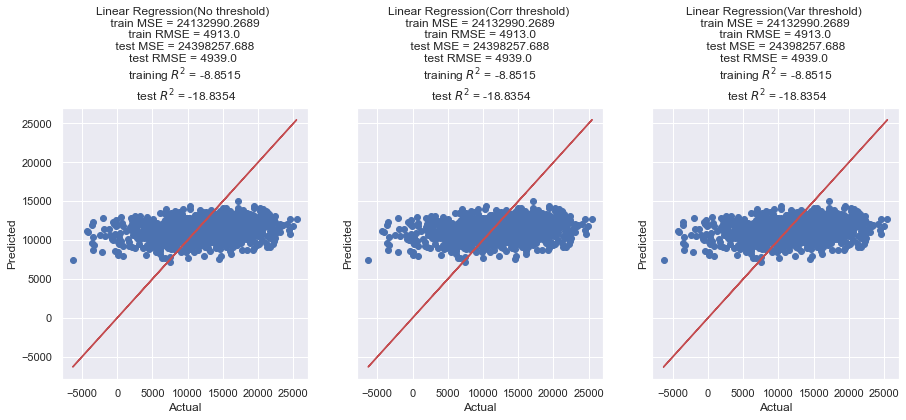

In [358]:
train_ols_df, y_ols_df, x_ols_df = create_ols_df(train_ols_df_v01_final)

lrm = train_ols_model(x_ols_df, y_ols_df)

The mean square error are particularly high, for the training & testing. <br/>
#####a00 over-fitting, under?

#### OLS Regression Prediction for Kaggle Competition.

---

We do simple EDA on the test dataset & carry out all the manipulations that had been done on the dataset prior to model creation, after which we shall select the columns that are utilized in training the model.

In [59]:
#create a copy test_df... just in case.
test_copy_df = test_df.copy(deep= True)
    
print('Dataset Info: \n {}'.format(test_copy_df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

The features have a similar structure to our training data. 👍 <br/>
We shall:
1. Convert the time column data type.
2. Split the time column into year, month & hours
3. Drop the 'Unnamed: 0' & 'time' columns
4. Re-order the columns so the time columns are at the start.

In [60]:
test_copy_df['time'] = pd.to_datetime(test_copy_df['time'], format='%Y-%m-%d %H:%M:%S')

test_copy_df['year'] = pd.DatetimeIndex(test_copy_df['time']).year
test_copy_df['month'] = pd.DatetimeIndex(test_copy_df['time']).month
test_copy_df['hour'] = pd.DatetimeIndex(test_copy_df['time']).hour

test_copy_df = test_copy_df.drop(columns=['Unnamed: 0','time'], axis=1)

col_titles = ['year'] + ['month'] + ['hour'] + [col for col in test_copy_df.columns \
     if col not in ['year', 'month', 'hour']]

test_copy_df = test_copy_df.reindex(columns= col_titles)
test_copy_df.head(2)

,year,month,hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018,1,0,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,2018,1,3,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [325]:
# check for null values
test_copy_df.isna().sum()

time                      0
year                      0
month                     0
hour                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp       

Valencia_pressure contains null values, which we shall replace as before.

In [326]:
test_copy_df.loc[test_copy_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     test_copy_df.loc[test_copy_df['Valencia_pressure'].isna(), 'Madrid_pressure']

We create Dummy variables by one-hot encoding the categorical features in the dataset. <br/>
After which we reindex the columns

In [327]:
dummies_df = pd.get_dummies(test_copy_df[['Valencia_wind_deg','Seville_pressure']], drop_first = True)

test_copy_df = pd.concat([test_copy_df, dummies_df], axis='columns')
test_copy_df = test_copy_df.drop(['Valencia_wind_deg', 'Seville_pressure' ], axis='columns')
column_titles = [col for col in test_copy_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
test_copy_df = test_copy_df.reindex(columns = column_titles)
test_copy_df.head(2)

,time,year,month,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h
0,2018-01-01 00:00:00,2018,1,0,5.000000,0.0,5.000000,87.0,71.333333,20.0,...,0,1,0,0,0,0,0,0,0,NaN
1,2018-01-01 03:00:00,2018,1,3,4.666667,0.0,5.333333,89.0,78.000000,0.0,...,0,1,0,0,0,0,0,0,0,NaN


This was the final manipulation that was carried out prior to model creation. <br/>
the function below will enable carrying out these steps automatically for other models to be built.

In [185]:
def prepare_test_df(test_df = test_df):
    #Make a copy DF
    test_copy_df = test_df.copy(deep= True)

    # Convert time column to numpydatetime
    test_copy_df['time'] = pd.to_datetime(test_copy_df['time'], format='%Y-%m-%d %H:%M:%S')

    #Split time to year, month, day & hour
    test_copy_df['year'] = pd.DatetimeIndex(test_copy_df['time']).year
    test_copy_df['month'] = pd.DatetimeIndex(test_copy_df['time']).month
    test_copy_df['day'] = pd.DatetimeIndex(test_copy_df['time']).day
    test_copy_df['hour'] = pd.DatetimeIndex(test_copy_df['time']).hour

    # Drop Unnamed:0 & time columns
    test_copy_df = test_copy_df.drop(columns=['Unnamed: 0','time'], axis=1)

    # Replace Null values in Valencia_pressure with values from Madrid_pressure
    test_copy_df.loc[test_copy_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
    test_copy_df.loc[test_copy_df['Valencia_pressure'].isna(), 'Madrid_pressure']

    #create dummy variables
    dummies_df = pd.get_dummies(test_copy_df[['Valencia_wind_deg','Seville_pressure']], drop_first = True)

    # Add Dummy variables to DF
    test_copy_df = pd.concat([test_copy_df, dummies_df], axis='columns')
    test_copy_df = test_copy_df.drop(['Valencia_wind_deg', 'Seville_pressure' ], axis='columns')

    #Re-order the columns
    col_titles = ['year'] + ['month'] + ['hour'] + [col for col in test_copy_df.columns \
        if col not in ['year', 'month', 'hour','load_shortfall_3h']] + ['load_shortfall_3h']
    test_copy_df = test_copy_df.reindex(columns = column_titles)
    
    test_copy_df.head(2)

    return test_copy_df

 We shall then filter the columns so that we can remain with only the columns that were used in training the model.

In [328]:
test_copy_ols_df = test_copy_df[[i for i in test_copy_df.columns if i in train_ols_df_v01_final.columns]]

test_copy_ols_df.head(2)

,year,month,hour,Madrid_wind_speed,Bilbao_rain_1h,Seville_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_weather_id,Bilbao_pressure,Valencia_temp,Valencia_humidity,Valencia_wind_deg_level_10,Valencia_wind_deg_level_9,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp7,load_shortfall_3h
0,2018,1,0,5.000000,0.0,87.0,20.0,3.000000,193.333333,4.000000,...,800.000000,1025.666667,287.483333,46.333333,0,0,0,1,0,NaN
1,2018,1,3,4.666667,0.0,89.0,0.0,3.666667,143.333333,4.666667,...,800.333333,1026.666667,284.150000,53.666667,0,0,0,1,0,NaN


We shall now carry out the prediction based on the developed model.

In [329]:
#carry out the prediction
test_copy_ols_df['load_shortfall_3h'] = lrm.predict(test_copy_ols_df[[i for i in test_copy_ols_df if i not in 'load_shortfall_3h']])
predict_df = pd.DataFrame({
    'time':test_copy_df['time'],
    'load_shortfall_3h': test_copy_ols_df['load_shortfall_3h']

        })

predict_df

C:\Users\teddy\AppData\Local\Temp/ipykernel_10804/2430748117.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,load_shortfall_3h
0,2018-01-01 00:00:00,7837.701153
1,2018-01-01 03:00:00,8053.172647
2,2018-01-01 06:00:00,8624.097883
3,2018-01-01 09:00:00,9128.615349
4,2018-01-01 12:00:00,8409.942671
...,...,...
2915,2018-12-31 09:00:00,10450.353560
2916,2018-12-31 12:00:00,12169.989366
2917,2018-12-31 15:00:00,12103.724121
2918,2018-12-31 18:00:00,12954.259209


We export the Predict DF to csv for Kaggle submission.

In [314]:
# file_name = #a00 develop iterative file naming strings based on dates & models.
predict_df.to_csv('shortfall.csv', header=True, index=False)

### Decision Trees Regression Modelling

The starting pointshall be the `train_copy_df`, which contains all our columns from data engineering

In [29]:
train_dtr_df = train_copy_df.copy(deep= True)

In [31]:
# Create the dataframes to be used in this model creation instance
train_dtr_df, y_dtr_df, x_dtr_df = create_x_y_df(train_dtr_df)

# # Fit it for an OLS Regression Model
# fitted_ols_model = fit_ols_model(train_ols_df)

We declare a function that will:
- Split the data into train & test<br/>
- Create the DecisionTree object <br/>
- Fit the model to our dataset. <br/>
- Plot a visualization of the regression tree

In [67]:
def fit_dtr_model(data_df = None, max_depth = 2, random_state = 2):

    # Create the dataframes to be used in this model creation instance
    train_dtr_df, y_dtr_df, x_dtr_df = create_x_y_df(data_df)

    x_train, x_test, y_train, y_test = train_test_split(
                                            x_dtr_df,
                                            y_dtr_df,
                                            test_size=0.2,
                                            random_state=42)

    dtrm = DecisionTreeRegressor(max_depth = max_depth, random_state= random_state)

    dtrm.fit(x_train, y_train)

    # plt.figure(figsize=(15,5))
    # #assigned a random variable name to the plot to suppress text output
    # _ = plot_tree(dtrm,  filled=True)

    # get predictions for test data
    y_pred = dtrm.predict(x_test)

    # calculate MSE
    MSE = mean_squared_error(y_pred,y_test)
    RMSE = np.sqrt(MSE)

    # Report MSE and RMSE
    # print("Regression Decision Tree model MSE is:",MSE)
    # print("Regression Decision Tree model RMSE is:",RMSE)

    return dtrm, RMSE

We shall use an iteration loop that will:
1. Change the correlation threshold in our dataset, so that we feed different count of features to our model
2. Tweak hyper parameters in order to compare the results of different settings of the model.

In [69]:
thresh_list = [0.2, 0.4, 0.6, 0.8]
max_depth_list = [2, 4, 8, 16]
random_state_list = [4, 16, 32, 64]
dtrm_perf_df = pd.DataFrame({
                'Correlation Threshold':[],
                'Count of Columns': [],
                'Max Depth': [],
                'Random State': [],
                'RMSE': []
})

for thresh in thresh_list:
    corr_cols = filter_by_corr(train_dtr_df, threshold= thresh)

    train_dtr_df_v01 = train_dtr_df[[i for i in train_dtr_df.columns if i not in corr_cols]]
    # print('Correlation threshold value is: \t {}'.format(thresh))


    for max_depth in max_depth_list:
        # print('Max Depth value is: \t {}'.format(max_depth))

        for random_state in random_state_list:
            # print('Random State value is: \t {}'.format(random_state))
            dtrm, RMSE = fit_dtr_model(train_dtr_df_v01, max_depth, random_state)

            dtrm_perf_df = dtrm_perf_df.append(
                                pd.DataFrame({
                                    'Correlation Threshold':[thresh],
                                    'Count of Columns': [len(train_dtr_df_v01.columns)],
                                    'Max Depth': [max_depth],
                                    'Random State': [random_state],
                                    'RMSE': [RMSE]
                                }),
                            ignore_index = True
                            )

dtrm_perf_df.sort_values(by= 'RMSE', axis= 0)

,Correlation Threshold,Count of Columns,Max Depth,Random State,RMSE
40,0.6,62.0,8.0,4.0,3984.365629
43,0.6,62.0,8.0,64.0,4006.412812
41,0.6,62.0,8.0,16.0,4029.420813
58,0.8,66.0,8.0,32.0,4029.580831
57,0.8,66.0,8.0,16.0,4030.649494
...,...,...,...,...,...
0,0.2,43.0,2.0,4.0,4985.148665
14,0.2,43.0,16.0,32.0,5464.883070
13,0.2,43.0,16.0,16.0,5466.868730
15,0.2,43.0,16.0,64.0,5536.854320


######a00 add comments on the above: number of cols, relating to max_depth, <br/>
- It's evdent that a high max depth (16) does not result in a better prediction model.
- Also, a low correlation coefficient (0.2) ie. using more correlated columns, reduces the model's performance.<br/>
- Variations in random state has little effect on the predictability.

We can create a DecisionTree Regression model based on the best performing combination in this output, which is:
- Correlation threshold = 0.6
- Max Depth = 8
- Random State = 4

In [61]:
#Create the best performing model of the DecisionTree Model
thresh = 0.6
max_depth = 8
random_state = 4

corr_cols = filter_by_corr(train_dtr_df, threshold= thresh)

train_dtr_df_v01 = train_dtr_df[[i for i in train_dtr_df.columns if i not in corr_cols]]

dtrm, RMSE = fit_dtr_model(train_dtr_df_v01, max_depth, random_state)

Regression Decision Tree model MSE is: 15875169.46856114
Regression Decision Tree model RMSE is: 3984.3656293770455


The above model resulted in a Kaggle RMSE OF 4710, a huge discrepancy from 3984. This may be a case of over-fitting to the training data, thus the model performs poorly with unseen data. <br/>
We arbitrarily selected the following parameters:
Correlation threshold: 0.8, Max Depth: 6, Random State: 4, which had a training RMSE of 4094, & a Kaggle score of 4265.<br/>
We shall qualify this as the most optimum settings for the DecisionTree to make predictions, as higher or lower values do not offer better RMSE's, training or testing.

#### DecisionTree Regression Prediction for Kaggle Competition

---

In [62]:

test_copy_dtr_df = prepare_test_df()
test_copy_dtr_df = test_copy_dtr_df\
    [[i for i in test_copy_dtr_df.columns if i in train_dtr_df_v01.columns]]

test_copy_dtr_df.head(2)

,year,month,day,hour,Madrid_wind_speed,Valencia_wind_speed,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h
0,2018,1,1,0,5.000000,5.000000,71.333333,20.0,3.000000,0.0,...,0,1,0,0,0,0,0,0,0,NaN
1,2018,1,1,3,4.666667,5.333333,78.000000,0.0,3.666667,0.0,...,0,1,0,0,0,0,0,0,0,NaN


In [188]:
#carry out the prediction
def pred_kaggle(model, test_df, model_train_df):
    test_copy_df = prepare_test_df(test_df)

    test_copy_df = test_copy_df\
    [[i for i in test_copy_df.columns if i in model_train_df.columns]]

    test_copy_df.head(2)

    test_df['load_shortfall_3h'] = model.predict(
        test_copy_df[[i for i in test_copy_df \
            if i not in 'load_shortfall_3h']])

    predict_df = pd.DataFrame({
        'time':test_df['time'],
        'load_shortfall_3h': test_df['load_shortfall_3h']

            })

    predict_df.to_csv('pred_shortfall_modelname.csv', header=True, index=False)
    predict_df.head(3)




In [ ]:
#carry out the prediction
test_copy_dtr_df['load_shortfall_3h'] = dtrm.predict(test_copy_dtr_df[[i for i in test_copy_dtr_df if i not in 'load_shortfall_3h']])
predict_df = pd.DataFrame({
    'time':test_df['time'],
    'load_shortfall_3h': test_copy_dtr_df['load_shortfall_3h']

        })

predict_df.to_csv('pred_shortfall_DTR.csv', header=True, index=False)
predict_df.head(3)


,time,load_shortfall_3h
0,2018-01-01 00:00:00,14468.914530
1,2018-01-01 03:00:00,2760.735849
2,2018-01-01 06:00:00,2760.735849


### Random Forest Trees Regression Modelling

The starting pointshall be the `train_copy_df`, which contains all our columns from data engineering

In [250]:
train_rfrm_df = train_copy_df.copy(deep= True)

In [251]:
train_rfrm_df, y_rfrm_df, x_rfrm_df = create_x_y_df(train_rftr_df)

The following function enables fitting the RandomForest Algorithm with an array of hyperparameters to fit against, & the RMSE is calculated for each.

In [252]:
def fit_rfrm_model(data_df = None, n_estimators = 20, max_depth = 250):
    

    rfrm_perf_df = pd.DataFrame({
                'Correlation Threshold':[],
                'Count of Columns': [],
                'Max Depth': [],
                'Random State': [],
                'RMSE': []
})
    thresh_list = [0.2, 0.4, 0.6, 0.8]
    for thresh in thresh_list:

        corr_cols = filter_by_corr(data_df, threshold= thresh)

        data_df = data_df[[i for i in data_df.columns if i not in corr_cols]]

        # Create the dataframes to be used in this model creation instance
        data_df, y_df, x_df = create_x_y_df(data_df)

        x_train, x_test, y_train, y_test = train_test_split(
                                                x_df,
                                                y_df,
                                                test_size=0.2,
                                                random_state=42)
        print('Correlation threshold value is: \t {}'.format(thresh))
    
        n_estimators_list = [250, 300, 400]
        for n_estimator in n_estimators_list:
            print('N_estimator value is: \t {}'.format(n_estimator))


            max_depth_list = [20, 25, 30]
            for max_depth in max_depth_list:
                print('Max Depth value is: \t {}'.format(max_depth))


                rfrm = RandomForestRegressor(n_estimators= n_estimators,
                                                max_depth= max_depth,
                                                criterion= 'mse',
                                                random_state= 42)
                rfrm.fit(x_train, y_train)


                # plt.figure(figsize=(15,5))
                # #assigned a random variable name to the plot to suppress text output
                # _ = plot_tree(rfrm,  filled=True)

                # get predictions for test data
                y_pred = rfrm.predict(x_test)

                # calculate MSE
                MSE = mean_squared_error(y_pred,y_test)
                RMSE = np.sqrt(MSE)

                rfrm_perf_df = rfrm_perf_df.append(
                                pd.DataFrame({
                                    'Correlation Threshold':[thresh],
                                    'Count of Columns': [len(train_dtr_df_v01.columns)],
                                    'Max Depth': [max_depth],
                                    'Random State': [random_state],
                                    'RMSE': [RMSE]
                                }),
                            ignore_index = True
                            )

                # Report MSE and RMSE
                print("Random Forest Tree Regression model MSE is:",MSE)
                print("Random Forest Tree Regression model RMSE is:",RMSE)

    return rfrm, RMSE, 

rfrm, RMSE = fit_rfrm_model(train_rfrm_df)





We can also do the above by implementing Grid Search to tune our hyperparameters for the best alternative.

In [190]:
#implementing grid search for tunig hyperparameters
def grid_search_model(model, train_df = None, params = None):
    train_df, y_df, x_df = create_x_y_df(train_df)

    x_train, x_test, y_train, y_test = train_test_split(
                                            x_df,
                                            y_df,
                                            test_size=0.2,
                                            random_state=42)


    model.fit(x_train,y_train).predict(x_test)
                                   
    grid_search = GridSearchCV(estimator = model,
                                param_grid= params,
                                scoring='neg_mean_squared_error',
                                n_jobs = 4)

    grid_search.fit(x_train, y_train)

    print(grid_search.best_params_)

    print(grid_search.best_score_)

    return grid_search, model

Based on previous iterations, we determined that the best training results were provided by models with max_depth >25, n_estimators > 250

In [205]:
rfrm = RandomForestRegressor(n_estimators= 2,
                                    max_depth= 4,
                                    criterion= 'mse',
                                    random_state= 42)

params = {
        'n_estimators': [200, 250, 300],
        'max_depth': [20, 25, 30],
    }

grid_search_model(rfrm, train_rfrm_df, params)

{'max_depth': 25, 'n_estimators': 300}
-10447551.994223963


(GridSearchCV(estimator=RandomForestRegressor(max_depth=4, n_estimators=2,
                                              random_state=42),
              n_jobs=4,
              param_grid={'max_depth': [20, 25, 30],
                          'n_estimators': [200, 250, 300]},
              scoring='neg_mean_squared_error'),
 RandomForestRegressor(max_depth=4, n_estimators=2, random_state=42))

We shal implement this trained model for the Kaggle competition submission. We shall also develop the pickle file for the model

In [210]:
rfrm = RandomForestRegressor(n_estimators= 300,
                                    max_depth= 25,
                                    criterion= 'mse',
                                    random_state= 24)

train_df, y_df, x_df = create_x_y_df(train_rfrm_df)

x_train, x_test, y_train, y_test = train_test_split(
                                        x_df,
                                        y_df,
                                        test_size=0.2,
                                        random_state=42)


rfrm.fit(x_train, y_train)

pickle.dump('rfr_model_25_300.pkl', 'w')


TypeError: file must have a 'write' attribute

#### RandomForest Regression Prediction for Kaggle Competition

---

In [180]:

test_copy_rfrm_df = prepare_test_df()
test_copy_rfrm_df = test_copy_rfrm_df\
        [['month', 'Valencia_temp_min', 'Madrid_temp_max', 'Barcelona_temp',
 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']]


test_copy_rfrm_df.shape

(2920, 11)

In [209]:
pred_kaggle(rfrm, test_df, train_rfrm_df)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Evaluation of the Linear Regression Model

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

### Decision Trees

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Based on the above graphs, the model fails to properly fit the data. <br/>
It was visible from the EDA's scatter plots that there was little proof that the features are linearly related with the predict variable. <br/>

The performance of the Decision Trees had anticipated better performance. <br/>
Given our dataset, we can understand that the features have little cumulative correlation. Thus, a model that enables segmenting results based on key column values would be suitable. Decision Trees implement a strategy that form split paths (branches) based on column values, carrying this out as many times as the maximum depth specified for the model.

Random Forest Regression is simply an implementation of multiple Decision Trees. It utilizes different sections of the dataset to come up with singular Decision Trees. Having all these alternative paths to cover during use, means that the model is able to more deeply fit the data, without over-fitting.

In [ ]:
# discuss chosen methods logic

### 8. Test Predictions

#### Predictions for the Linear Regression Model

In [ ]:
#create a copy of the test DF, & select the columns to be used by our model
test_train_df = test_df[[i for i in X_corr_names if i in test_df.columns]]

Carry out the prediction

Output .csv results to be uploaded to Kaggle

In [ ]:
#save dataframe to csv
sub_df.to_csv('shortfall.csv', header=True, index=False)